In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
mao = pd.read_csv('/content/drive/MyDrive/NS_Projekt/mao_all.csv')
rna = pd.read_csv('/content/drive/MyDrive/NS_Projekt/rna_all.csv')
acyclic = pd.read_csv('/content/drive/MyDrive/NS_Projekt/acyclic_all.csv')
mao_C = pd.read_csv('/content/drive/MyDrive/NS_Projekt/mao_C.csv')
rna_C = pd.read_csv('/content/drive/MyDrive/NS_Projekt/rna_C.csv')
acyclic_C = pd.read_csv('/content/drive/MyDrive/NS_Projekt/acyclic_C.csv')

In [9]:
col = sns.color_palette("mako")

In [10]:
def diff(a,b):
    return b-a


def lower(a,b):
  if a < b:
    return 1
  if b < a:
    return -1
  else:
    return 0

In [11]:
mao['Dataset']='MAO'
rna['Dataset']='RNA'
acyclic['Dataset']='Acyclic'

In [12]:
df = pd.concat([acyclic, mao, rna])

In [13]:
df['Induced Edit Cost Sinkhorn Lower'] = df.apply(lambda x: lower(x['Induced Edit Cost Sinkhorn'], x['Induced Edit Cost Hungarian']), axis=1)

In [14]:
df = df.rename({'Relative Error Upper Bound': 'Relative Error Induced Edit Cost', 'b': 'Y'}, axis=1)

In [15]:
df.head(-10)

,Unnamed: 0,Matching Cost Hungarian,Matching Cost Sinkhorn,Matching Cost Sinkhorn Projection,Induced Edit Cost Hungarian,Induced Edit Cost Sinkhorn,Relative Diversion Matching Cost Sinkhorn,Relative Diversion Matching Cost Sinkhorn Projection,Relative Error Induced Edit Cost,Entropy Sinkhorn Assignment,Runtime Hungarian,Runtime Sinkhorn,Runtime Sinkhorn Projection,T_max,T_param,Dataset,Induced Edit Cost Sinkhorn Lower
0,0,2.0,11.216871,2.0,2.0,2.0,3.072290,0.000000,0.000000,10.120436,0.000002,0.008626,0.008970,2.0,2.0,Acyclic,0
1,1,7.0,15.608168,7.0,10.0,9.0,1.076021,0.000000,-0.090909,12.835828,0.000002,0.000227,0.000247,2.0,2.0,Acyclic,1
2,2,5.0,14.791974,5.0,8.0,7.0,1.631996,0.000000,-0.111111,12.839331,0.000002,0.000218,0.000234,2.0,2.0,Acyclic,1
3,3,10.0,19.184215,10.0,13.0,12.0,0.834929,0.000000,-0.071429,15.697062,0.000002,0.000215,0.000231,2.0,2.0,Acyclic,1
4,4,10.0,19.184215,10.0,13.0,12.0,0.834929,0.000000,-0.071429,15.697062,0.000002,0.000214,0.000229,2.0,2.0,Acyclic,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574860,574860,21.0,21.000193,22.5,87.0,85.0,0.000009,0.068182,-0.022727,255.030693,0.000083,0.004209,0.004338,95.0,95.0,RNA,1
574861,574861,27.5,25.941674,27.5,87.0,97.0,-0.054678,0.000000,0.113636,245.756314,0.000129,0.004607,0.004713,95.0,95.0,RNA,-1
574862,574862,509.5,507.225872,509.5,643.0,643.0,-0.004455,0.000000,0.000000,923.606765,0.000277,0.004852,0.005483,95.0,95.0,RNA,0
574863,574863,10.5,10.460603,10.5,67.0,72.0,-0.003426,0.000000,0.073529,237.159621,0.000077,0.004002,0.004114,95.0,95.0,RNA,-1


In [ ]:
#Je kleiner, desto öfter ist Sinkhorn besser als Hungarian
def upper_bound_sinkhorn_better(dataset_name, without_T_max_is_one):
  if dataset_name=='all':
    df_dataset = df
  else:
    df_dataset = df[df['Dataset']==dataset_name]

  if without_T_max_is_one == True:
    df_dataset = df_dataset[df_dataset['T_max']>1]

  T_max = list(set(df_dataset['T_max']))
  T_param = list(set(df_dataset['T_param']))

  pair = []
  rel_error_upper_bound_per_pair = []
  count_upper_bound_sinkhorn_higher_per_pair = []
  sinkhorn_better_sum_ec = []
  sinkhorn_better_count_ec = []
  hungarian_better_count_ec = []
  sinkhorn_matching_cost_smaller_0 = []
  sinkhorn_better_sum_mc = []
  sinkhorn_better_count_mc = []
  x = []
  y = []
  sinkhorn_better = []

  from matplotlib.colors import ListedColormap
  cmap = ListedColormap([[0.5800230680507498, 0.8189004229142637, 0.7502806612841215], [0.21697808535178778, 0.3273356401384083, 0.3694117647058824]])

  for m in T_max:
    for p in T_param:
      _df = df_dataset[df_dataset['T_max']==m]
      __df = _df[_df['T_param']==p]
      liste_count = list(__df['Induced Edit Cost Sinkhorn Lower'])
      kleiner_null = len(__df[__df['Relative Diversion Matching Cost Sinkhorn']<0])
      groesser_null = len(__df[__df['Relative Diversion Matching Cost Sinkhorn']>0])

      sb = 0
      hb = 0
      for i in range(len(liste_count)):
        if liste_count[i]==1:
          sb += 1
        if liste_count[i]==-1:
          hb +=1

      summe_sinkhorn_ec = sum(__df['Induced Edit Cost Sinkhorn'])
      summe_hungarian_ec = sum(__df['Induced Edit Cost Hungarian'])
      summe_sinkhorn_mc = sum(__df['Matching Cost Sinkhorn'])
      summe_hungarian_mc = sum(__df['Matching Cost Hungarian'])


      if summe_sinkhorn_ec < summe_hungarian_ec:
        sinkhorn_better_sum_ec.append(1)
      if summe_sinkhorn_ec > summe_hungarian_ec:
        sinkhorn_better_sum_ec.append(0)

      if sb > hb:
        sinkhorn_better_count_ec.append(1)
      if sb < hb:
        sinkhorn_better_count_ec.append(0)

      if summe_sinkhorn_mc < summe_hungarian_mc:
        sinkhorn_better_sum_mc.append(1)
      if summe_sinkhorn_mc > summe_hungarian_mc:
        sinkhorn_better_sum_mc.append(0)

      if kleiner_null > groesser_null:
        sinkhorn_better_count_mc.append(1)
      if kleiner_null < groesser_null:
        sinkhorn_better_count_mc.append(0)

      pair.append((m,p))
      #rel_error_upper_bound_per_pair.append(summe)

  for i in range(len(pair)):
    x.append(pair[i][0])
    y.append(pair[i][1])

  plt.title("Sinkhorn has smaller sum of Induced Edit Costs")
  plt.scatter(x, y, c=sinkhorn_better_sum_ec, cmap=cmap)
  plt.xlabel("T_max")
  plt.ylabel("T_param")
  cb = plt.colorbar(ticks=[0.25,.75])
  cb.set_ticklabels([0,1])
  plt.show()

  plt.title("Sinkhorn has more often smaller Induced Edit Costs")
  plt.scatter(x, y, c=sinkhorn_better_count_ec, cmap=cmap)
  plt.xlabel("T_max")
  plt.ylabel("T_param")
  cb = plt.colorbar(ticks=[0.25,.75])
  cb.set_ticklabels([0,1])
  plt.show()

  plt.title("Sinkhorn has smaller sum of Matching Costs")
  plt.scatter(x, y, c=sinkhorn_better_sum_mc, cmap=cmap)
  plt.xlabel("T_max")
  plt.ylabel("T_param")
  cb = plt.colorbar(ticks=[0.25,.75])
  cb.set_ticklabels([0,1])
  plt.show()

  plt.title("Sinkhorn has more often smaller Matching Costs")
  plt.scatter(x, y, c=sinkhorn_better_count_mc, cmap=cmap)
  plt.xlabel("T_max")
  plt.ylabel("T_param")
  cb = plt.colorbar(ticks=[0.25,.75])
  cb.set_ticklabels([0,1])
  plt.show()

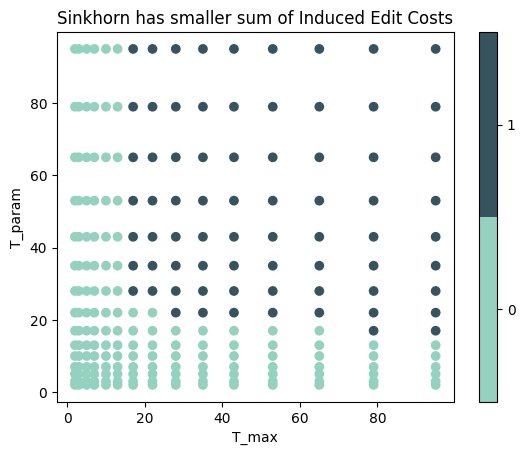

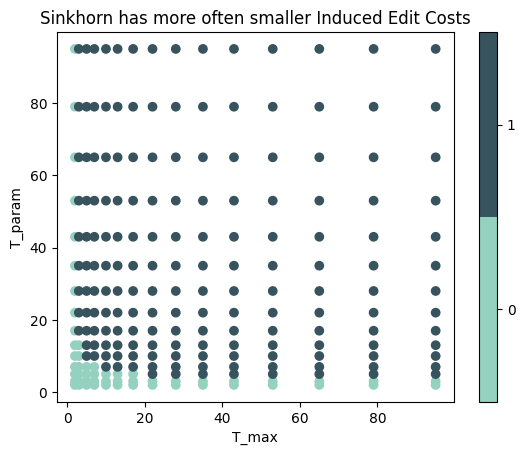

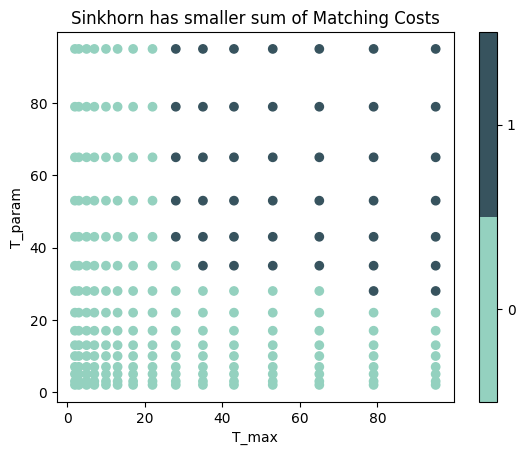

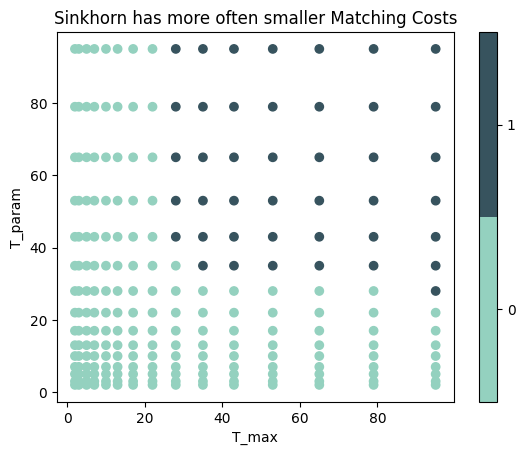

In [ ]:
upper_bound_sinkhorn_better('all', without_T_max_is_one=True)
#print(dff[dff['Induced Edit Cost Sinkhorn Lower']==False])

In [ ]:
#print(dff[dff['']==True])
dff = df[df['T_max'] > 1 ]

<Axes: xlabel='T_max', ylabel='Relative Diversion Matching Cost Sinkhorn'>

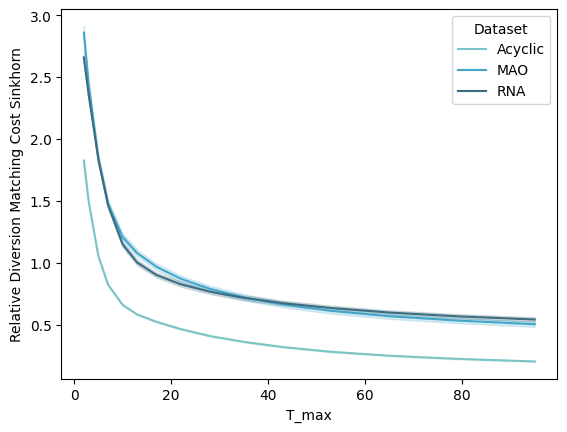

In [ ]:
sns.lineplot(x = "T_max", y = "Relative Diversion Matching Cost Sinkhorn", hue="Dataset", data = dff, palette = 'GnBu_d')

<Axes: xlabel='T_max', ylabel='Relative Diversion Matching Cost Sinkhorn'>

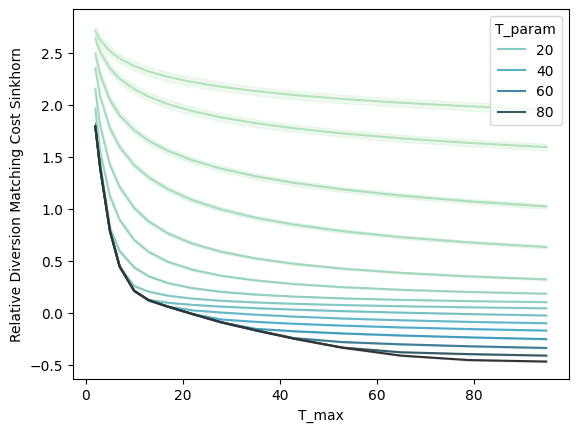

In [ ]:
sns.lineplot(x = "T_max", y = "Relative Diversion Matching Cost Sinkhorn", hue="T_param", data = dff, palette = 'GnBu_d')

<Axes: xlabel='T_param', ylabel='Relative Diversion Matching Cost Sinkhorn'>

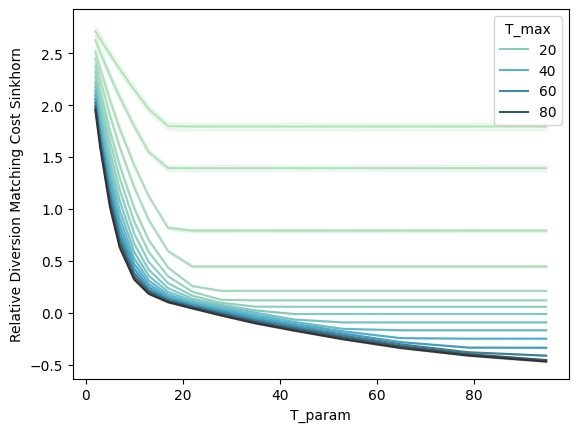

In [ ]:
sns.lineplot(x = "T_param", y = "Relative Diversion Matching Cost Sinkhorn", hue="T_max", data = dff, palette = 'GnBu_d')

<Axes: xlabel='T_param', ylabel='Relative Diversion Matching Cost Sinkhorn'>

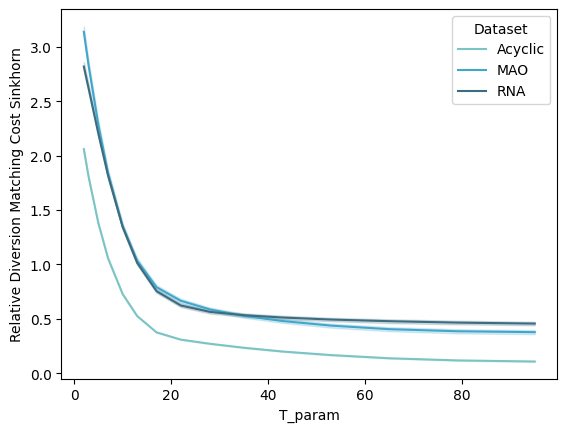

In [ ]:
sns.lineplot(x = "T_param", y = "Relative Diversion Matching Cost Sinkhorn", hue="Dataset", data = dff, palette = 'GnBu_d')

<Axes: xlabel='T_max', ylabel='Relative Diversion Matching Cost Sinkhorn Projection'>

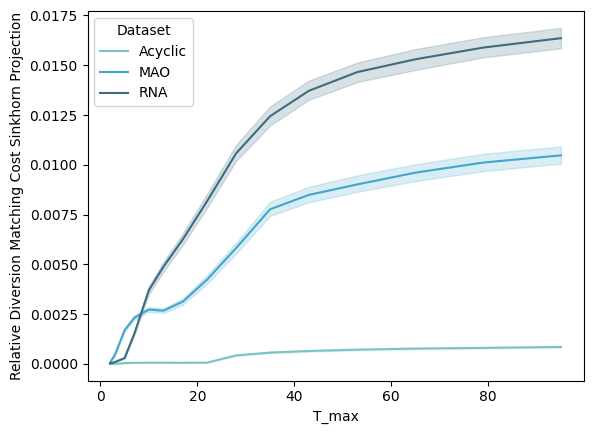

In [ ]:
sns.lineplot(x = "T_max", y = "Relative Diversion Matching Cost Sinkhorn Projection", hue="Dataset", data = dff, palette = 'GnBu_d')

<Axes: xlabel='T_max', ylabel='Relative Diversion Matching Cost Sinkhorn Projection'>

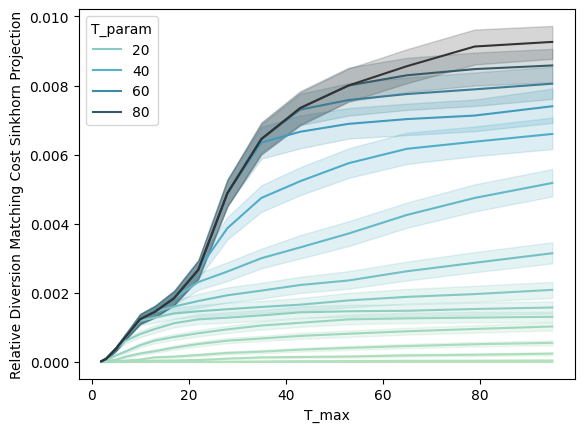

In [ ]:
sns.lineplot(x = "T_max", y = "Relative Diversion Matching Cost Sinkhorn Projection", hue="T_param", data = df[df['T_max'] > 1 ], palette = 'GnBu_d')

<Axes: xlabel='T_param', ylabel='Relative Diversion Matching Cost Sinkhorn Projection'>

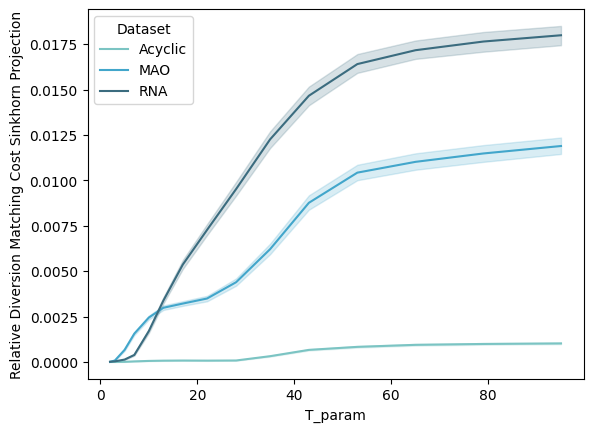

In [ ]:
sns.lineplot(x = "T_param", y = "Relative Diversion Matching Cost Sinkhorn Projection", hue = "Dataset", data = dff, palette = 'GnBu_d')

<Axes: xlabel='T_param', ylabel='Relative Diversion Matching Cost Sinkhorn Projection'>

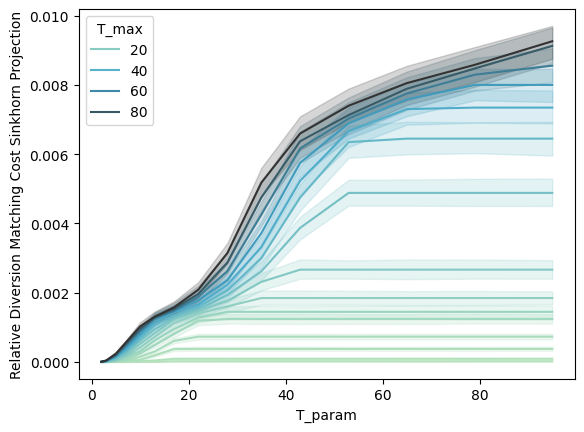

In [ ]:
sns.lineplot(x = "T_param", y = "Relative Diversion Matching Cost Sinkhorn Projection", hue = "T_max", data = df[df['T_max'] > 1 ], palette = 'GnBu_d')

<Axes: xlabel='T_max', ylabel='Relative Error Induced Edit Cost'>

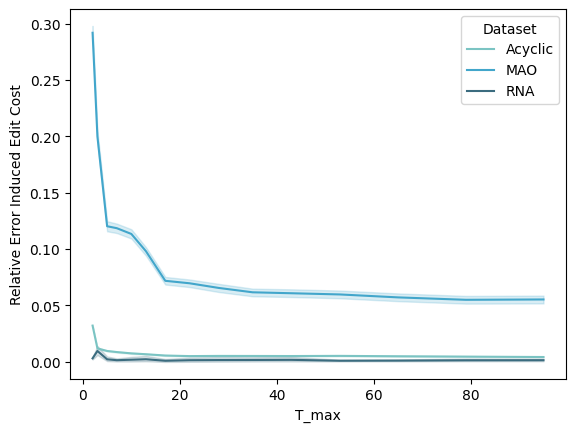

In [ ]:
sns.lineplot(x = "T_max", y = "Relative Error Induced Edit Cost", hue="Dataset", data = dff, palette = 'GnBu_d')

<Axes: xlabel='T_max', ylabel='Relative Error Induced Edit Cost'>

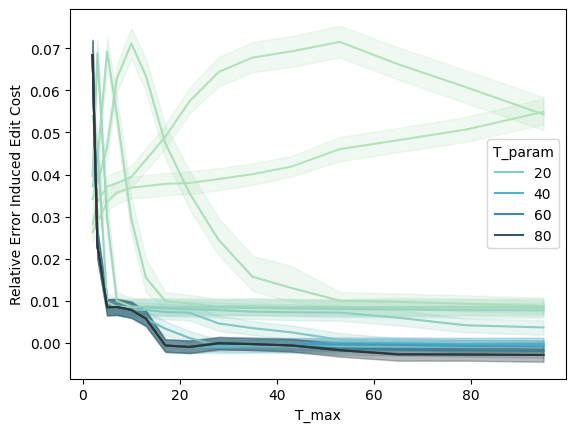

In [ ]:
sns.lineplot(x = "T_max", y = "Relative Error Induced Edit Cost", hue="T_param", data = df[df['T_max'] > 1 ], palette = 'GnBu_d')

<Axes: xlabel='T_param', ylabel='Relative Error Induced Edit Cost'>

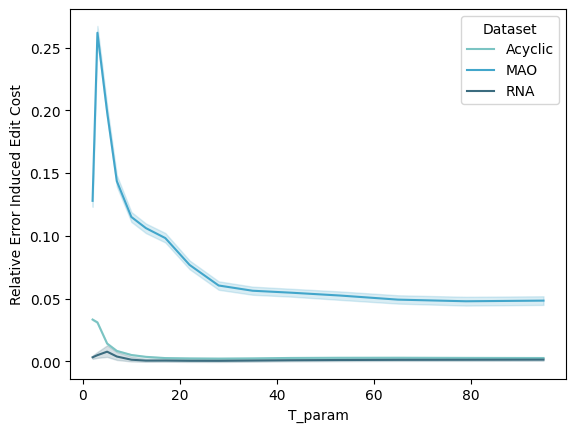

In [ ]:
sns.lineplot(x = "T_param", y = "Relative Error Induced Edit Cost", hue="Dataset", data = dff, palette = 'GnBu_d')

<Axes: xlabel='T_param', ylabel='Relative Error Induced Edit Cost'>

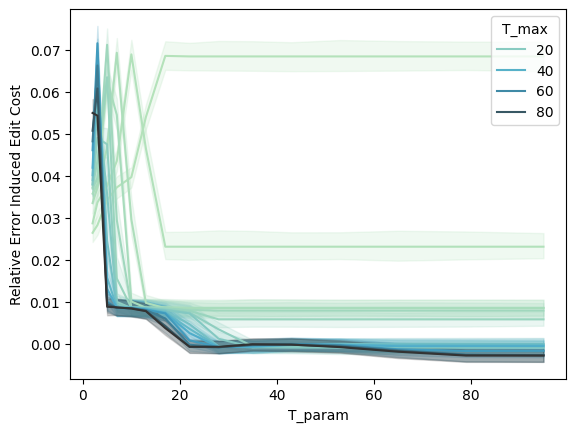

In [ ]:
sns.lineplot(x = "T_param", y = "Relative Error Induced Edit Cost", hue="T_max", data = df[df['T_max'] > 1 ], palette = 'GnBu_d')

In [ ]:
sns.lineplot(x = "Runtime Sinkhorn", y = "Runtime Hungarian", data = df[df['T_max'] > 1 ], palette = 'GnBu_d')

<ipython-input-24-a7f4c131a6c0>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x = "Runtime Sinkhorn", y = "Runtime Hungarian", data = df[df['T_max'] > 1 ], palette = 'GnBu_d')


In [ ]:
#sns.lineplot(x = "T_max", y = "Induced Edit Cost Sinkhorn Lower", hue="Dataset", data = df, palette = 'GnBu_d')

In [ ]:
#sns.lineplot(x = "T_max", y = "Induced Edit Cost Sinkhorn Lower", hue="T_param", data = df, palette = 'GnBu_d')

In [ ]:
#sns.lineplot(x = "T_param", y = "Induced Edit Cost Sinkhorn Lower", hue="T_max", data = df)

<ipython-input-90-30b5d26f2a05>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x = "Matching Cost Sinkhorn Projection",y = "Matching Cost Sinkhorn", data = df, palette = 'GnBu_d')


<Axes: xlabel='Matching Cost Sinkhorn Projection', ylabel='Matching Cost Sinkhorn'>

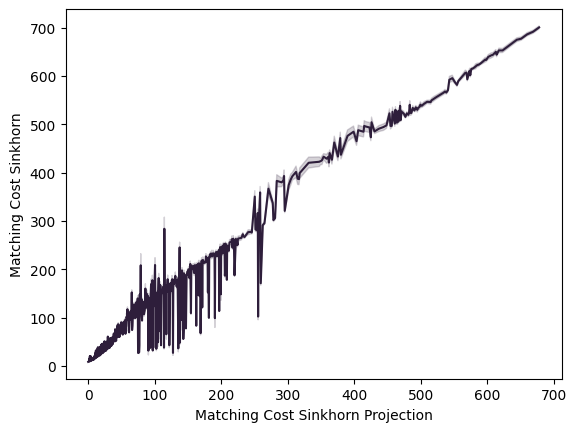

In [ ]:
sns.lineplot(x = "Matching Cost Sinkhorn Projection",y = "Matching Cost Sinkhorn", data = df, palette = 'GnBu_d')

In [ ]:
#sns.lineplot(x="Entropy Sinkhorn Assignment",y="Relative Error Matching Cost Sinkhorn", data=df)

In [ ]:
#sns.lineplot(x="Entropy Sinkhorn Assignment",y="Relative Error Matching Cost Sinkhorn Projection", data=df)

In [ ]:
#sns.lineplot(x="Entropy Sinkhorn Assignment",y="Relative Error Induced Edit Cost", data=df)

In [ ]:
#sns.lineplot(x="Entropy Sinkhorn Assignment",y="Runtime Hungarian", cut=0, data=df)

<ipython-input-123-3c82e58e17db>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x="Entropy Sinkhorn Assignment", y="Relative Diversion Matching Cost Sinkhorn", data=df, palette = 'GnBu_d')


KeyboardInterrupt: 

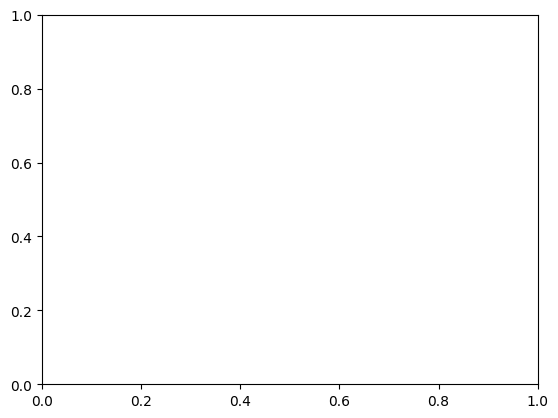

In [ ]:
sns.lineplot(x="Entropy Sinkhorn Assignment", y="Relative Diversion Matching Cost Sinkhorn", data=dff, palette = 'GnBu_d')

In [ ]:
sns.lineplot(x="Entropy Sinkhorn Assignment", y="Relative Diversion Matching Cost Sinkhorn Projection", data=dff, palette = 'GnBu_d')

In [ ]:
#sns.lineplot(x="T_max",y="Entropy Sinkhorn Assignment", data=df)

In [ ]:
#sns.lineplot(x="T_param",y="Entropy Sinkhorn Assignment", data=df)

<ipython-input-95-1589a7fe3f6e>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x="T_param",y="Runtime Sinkhorn", data=df, palette = 'GnBu_d')


<Axes: xlabel='T_param', ylabel='Runtime Sinkhorn'>

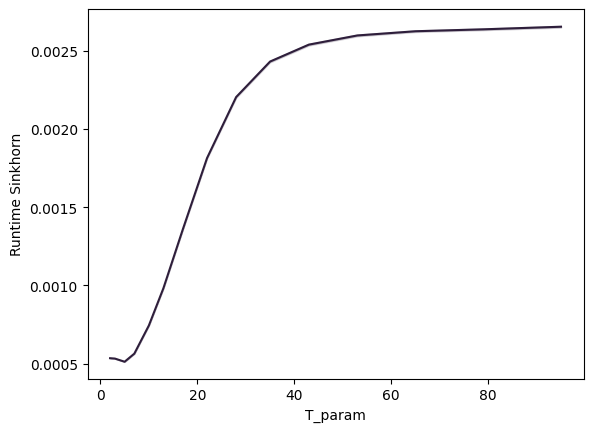

In [ ]:
sns.lineplot(x="T_param",y="Runtime Sinkhorn", data=df, palette = 'GnBu_d')

<ipython-input-98-c4908c179930>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x="T_max",y="Runtime Sinkhorn", data=df, palette = 'GnBu_d')


<Axes: xlabel='T_max', ylabel='Runtime Sinkhorn'>

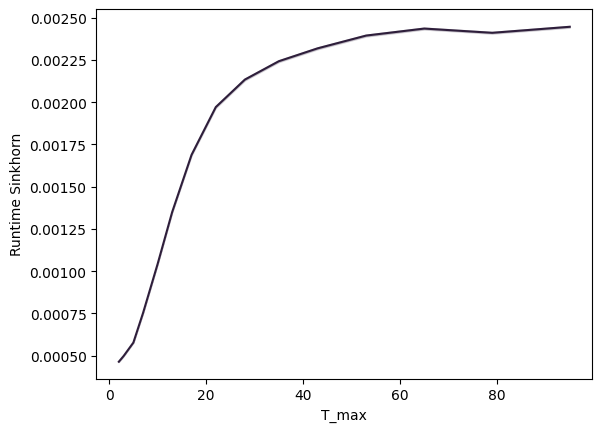

In [ ]:
sns.lineplot(x="T_max",y="Runtime Sinkhorn", data=df, palette = 'GnBu_d')

In [11]:
dff = df[df['T_max'] > 1 ]
print(min(dff['Relative Diversion Matching Cost Sinkhorn']))

-0.9307684470834072


In [12]:
print(np.mean(dff['Relative Diversion Matching Cost Sinkhorn']))

0.740907088713801


In [13]:
print(max(dff['Relative Diversion Matching Cost Sinkhorn']))

print(dff[dff['Matching Cost Sinkhorn Projection']>dff['Induced Edit Cost Sinkhorn']])

#kleine T_param 1-5

166.69603728223592
Empty DataFrame
Columns: [Unnamed: 0, Matching Cost Hungarian, Matching Cost Sinkhorn, Matching Cost Sinkhorn Projection, Induced Edit Cost Hungarian, Induced Edit Cost Sinkhorn, Relative Diversion Matching Cost Sinkhorn, Relative Diversion Matching Cost Sinkhorn Projection, Relative Error Induced Edit Cost, Entropy Sinkhorn Assignment, Runtime Hungarian, Runtime Sinkhorn, Runtime Sinkhorn Projection, T_max, T_param, Dataset, Induced Edit Cost Sinkhorn Lower]
Index: []


In [14]:
print(min(dff['Relative Diversion Matching Cost Sinkhorn Projection']))

0.0


In [15]:
print(np.mean(dff['Relative Diversion Matching Cost Sinkhorn Projection']))

0.0017787083219903677


In [16]:
print(max(dff['Relative Diversion Matching Cost Sinkhorn Projection']))

0.8695652173913043


In [17]:
print(min(dff['Relative Error Induced Edit Cost']))

-0.8125


In [18]:
print(np.mean(dff['Relative Error Induced Edit Cost']))

0.016823749748776592


In [19]:
print(max(dff['Relative Error Induced Edit Cost']))

42.0


In [23]:
print(dff[dff['Relative Diversion Matching Cost Sinkhorn']>150])

        Unnamed: 0  Matching Cost Hungarian  Matching Cost Sinkhorn  \
73              73                      0.0              166.696037   
2628          2628                      0.0              164.330071   
5183          5183                      0.0              159.496074   
7738          7738                      0.0              154.542452   
38398        38398                      0.0              163.924482   
40953        40953                      0.0              160.095280   
43508        43508                      0.0              152.216128   
76723        76723                      0.0              160.366122   
79278        79278                      0.0              154.628123   
115048      115048                      0.0              157.985459   
117603      117603                      0.0              150.956614   
153373      153373                      0.0              155.432573   
191698      191698                      0.0              153.536700   
230023

In [ ]:
#sns.lineplot(x="T_param",y="Runtime Hungarian", data=df)

In [ ]:
import torch
import itertools
import numpy as np

def from_cost_to_sim_exp(C, T_max, T_param):
  n, m = C.shape
  ones_m = torch.ones((1, m))
  ones_n = torch.ones((n, 1))
  minL, _ = C.min(dim=1)
  minL[-1] = 0.0
  Cp = C-(minL.view(n, 1)@ones_m)
  T = min(T_max, T_param*torch.log(torch.tensor(T_max))/torch.max(Cp)) #*
  print("Cp max: ", torch.max(Cp))
  minC, _ = Cp.min(dim=0)
  minC[-1] = 0.0
  Cp = Cp-ones_n@minC.view(1, m)
  Cp = Cp/torch.max(Cp)
  S = torch.exp(-T*Cp)
  return S

In [ ]:
C = torch.tensor([[100., 99., 20], [50., 22., 14]])
from_cost_to_sim_exp(C, 7, 5)
#>> Cp has values between in [0,1]
#*: max(Cp) <= max(C)

Cp max:  tensor(80.)


tensor([[0.9380, 0.8855, 1.0000],
        [1.0000, 1.0000, 0.9706]])

In [ ]:
df = pd.DataFrame(columns=['T_param', 'T_max', 'c_max', 'c'])
c_max = 6
for T_param in [2, 3, 5, 7, 10, 13, 17, 22, 28, 35, 43, 53, 65, 79, 95]:
  for T_max in [2, 3, 5, 7, 10, 13, 17, 22, 28, 35, 43, 53, 65, 79, 95]:
    for c in range(1,601):
      s = np.exp(-min(T_max, T_param*np.log(T_max)/c_max)*c/100)
      new_row = {'T_param':T_param, 'T_max':T_max, 'c_max':c_max, 'c':c/100, 's':s}
      new_df = pd.DataFrame([new_row])
      df = pd.concat([df, new_df], axis=0, ignore_index=True)
print(df.head(10))

  T_param T_max c_max     c         s
0       2     2     6  0.01  0.997692
1       2     2     6  0.02  0.995390
2       2     2     6  0.03  0.993092
3       2     2     6  0.04  0.990801
4       2     2     6  0.05  0.988514
5       2     2     6  0.06  0.986233
6       2     2     6  0.07  0.983957
7       2     2     6  0.08  0.981686
8       2     2     6  0.09  0.979420
9       2     2     6  0.10  0.977160


<Axes: xlabel='c', ylabel='s'>

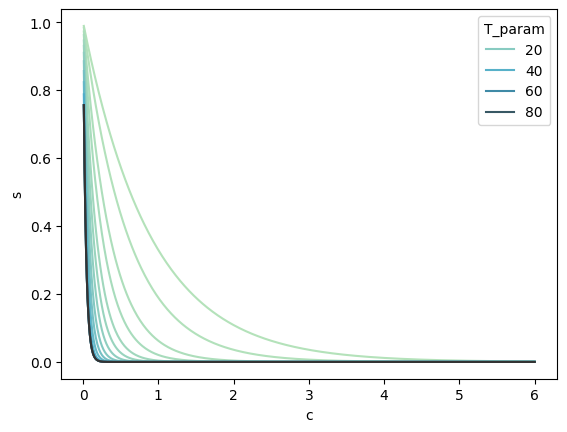

In [ ]:
sns.lineplot(x = "c", y = "s", hue="T_param", data = dff[dff['T_max'] == 28 ], palette = 'GnBu_d')

<Axes: xlabel='c', ylabel='s'>

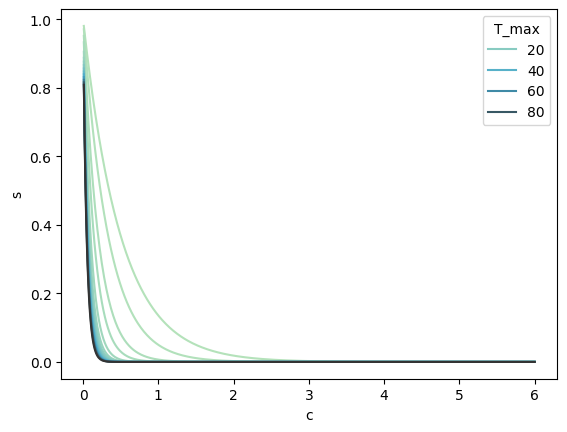

In [ ]:
sns.lineplot(x = "c", y = "s", hue="T_max", data = dff[dff['T_param'] == 28 ], palette = 'GnBu_d')